
## Project - NLP - Twitter US Airline Sentiment
### Sentiment Analysis using US Airline Twitter Feed

### Data Description:
- A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### Dataset: 
The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone

### Context:
Twitter posses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other side, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/services on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand, and their competitors, and discover new trends in the industry.
Objective:
To implement the techniques learnt as a part of the course.
### Learning Outcomes:
- Basic understanding of text pre-processing.
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model.
- Evaluate the Model

### Steps and tasks:
1. Steps and tasks:

1. Import the libraries, load dataset, the print shape of data, data description. (5 Marks)
2. Understand of data columns: (5 Marks)
     a. Drop all other columns except “text” and “airline_sentiment”.
     b. Check the shape of the data.
     c. Print the first 5 rows of data.
3. Text pre-processing: Data preparation. (16 Marks)
NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Removal of stopwords
     f. Conversion to lowercase.
     g. Lemmatize or stemming.
     h. Join the words in the list to convert back to text string in the data frame. (So that each row
          contains the data in text format.)
     i. Print the first 5 rows of data after pre-processing.
4. Vectorization: (10 Marks)
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
5. Fit and evaluate the model using both types of vectorization. (6+6 Marks)
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and the performance of your model on this dataset. (8 Marks)
7.Overall notebook should have:(4 Marks)
     a. Well commented code
     b. Structure and flow

In [4]:
#Install contractions
!pip install contractions

     |████████████████████████████████| 321 kB 5.6 MB/s 
     |████████████████████████████████| 283 kB 18.7 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85451 sha256=954391b2f52aeb40596b6da742e5f4634c330601bb4c923f2b6679b2b1e54511
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


## Importing Libraries

In [193]:
################################################################################
# Project: NLP - Text Classification                                          ##
# Sentiment Analysis - US Airlines Tweets                                     ##
# Submitted by "Bindu S Pillai"                                               ##
# AIML PG Program condcuted by University of Texas, Austin. Dated - 7/31/2021 ##
################################################################################
# library for creating data paths
import os

# library for randonly selecting data points
import random

# library for performing numerical computations
import numpy as np
import pandas as pd
np.random.seed(1)

# library for creating and showing plots
import matplotlib.pyplot as plt

# library for reading and showing images
import matplotlib.image as mpimg

#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

# importing all the required sub-modules from keras
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Mount Google Drive and load datset

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Read the file and load into pandas dataframe

In [194]:
data=pd.read_csv('gdrive/My Drive/Colab Notebooks/Tweets.csv')

In [195]:
# Display first few rows of the data
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
print(data.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

**Display shape of data, data descriptions**

In [196]:
# Number of rows followed by number of columns
data.shape

(14640, 15)

In [197]:
# Datatype lengths and other information of columns(entities)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [198]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [199]:
# Make a new copy of data to drop columns preprocessing etc.
tweets=data.copy()

In [200]:
# Drop id column to display readable statistics of data 
tweets=tweets.drop("tweet_id", axis=1)

In [201]:
tweets.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
airline_sentiment_confidence,14640.0,0.900169,0.162830,0.335,0.6923,1.0000,1.0,1.0
negativereason_confidence,10522.0,0.638298,0.330440,0.000,0.3606,0.6706,1.0,1.0
retweet_count,14640.0,0.082650,0.745778,0.000,0.0000,0.0000,0.0,44.0


#### Understanding of data columns:

In [202]:
print("Number of unique values in each column")
tweets.nunique()

Number of unique values in each column


airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [203]:
print("Missing values in each column")
data.isnull().sum()

Missing values in each column


tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

- Lot of missing values. But we can drop those columns in the sentiment analysis

In [204]:
# New dataframe after dropping all the unnecessary columns for analysis
USA_tweets=tweets[['text', 'airline_sentiment']]

In [205]:
# Shape of new dataframe
USA_tweets.shape

(14640, 2)

In [206]:
# Print first 5 rows of data
pd.set_option('display.max_colwidth', None)
USA_tweets.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


###Text pre-processing: Data preparation.

In [207]:
#remove html tags
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text


USA_tweets['text'] = USA_tweets['text'].apply(lambda x:  strip_html_tags(x))


USA_tweets.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [208]:
USA_tweets['text']

0                                                                                                                           @VirginAmerica What @dhepburn said.
1                                                                                      @VirginAmerica plus you've added commercials to the experience... tacky.
2                                                                                       @VirginAmerica I didn't today... Must mean I need to take another trip!
3                                    @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse
4                                                                                                       @VirginAmerica and it's a really big bad thing about it
                                                                                  ...                                                                          
14635                                   

In [209]:
## Remove numbers
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

USA_tweets['text'] = USA_tweets['text'].apply(lambda x: remove_numbers(x))

USA_tweets.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [210]:
USA_tweets['text']

0                                                                                                                       @VirginAmerica What @dhepburn said.
1                                                                                  @VirginAmerica plus you've added commercials to the experience... tacky.
2                                                                                   @VirginAmerica I didn't today... Must mean I need to take another trip!
3                                @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse
4                                                                                                   @VirginAmerica and it's a really big bad thing about it
                                                                                ...                                                                        
14635                                                           

In [211]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

USA_tweets['text'] = USA_tweets['text'].apply(lambda x: replace_contractions(x))

USA_tweets.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [212]:
USA_tweets['text']

0                                                                                                                        @VirginAmerica What @dhepburn said.
1                                                                                 @VirginAmerica plus you have added commercials to the experience... tacky.
2                                                                                   @VirginAmerica I did not today... Must mean I need to take another trip!
3                                @VirginAmerica it is really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse
4                                                                                                   @VirginAmerica and it is a really big bad thing about it
                                                                                ...                                                                         
14635                                                     

In [213]:
#Tokenization
USA_tweets['text'] = USA_tweets.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
USA_tweets.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [214]:
# Keeping a copy before further preprocessing
orig_data= USA_tweets.copy()

In [215]:
# Building stop words after appending some words(airline names in this case) as well as excluding some words.
stopwords = stopwords.words('english')


customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

newStopWords = [ 'americanair', 'virginamerica', 'usairways', 'jetblue', 'southwestair', 'http', 'flight', 'united']
stopwords.extend(newStopWords)

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))           

### Text Pre-processing
- Remove non-ascii characters
- convert to lower case
- remove punctuation
- Remove Stopwords.
- Lemmatized data
- Join the words in the list to convert back to text string in the data frame.    (So that each row contains the data in text format.)

In [216]:

lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    ## Join the words in the list to convert back to text string
    return ' '.join(words)   

# Apply all the functions for preprocessing to text.
USA_tweets['text'] = USA_tweets.apply(lambda row: normalize(row['text']), axis=1)

#Display first 5 rows after preprocessing
USA_tweets.head(5)

,text,airline_sentiment
0,dhepburn say,neutral
1,plus add commercials experience tacky,positive
2,not today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative
4,really big bad thing,negative


### **Word Cloud based on Text and Sentiment**

In [217]:
# Make a copy to create world cloud
df = USA_tweets.copy() 

In [218]:
# World Cloud Function
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(df, title):
    text = ' '.join(df['text'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

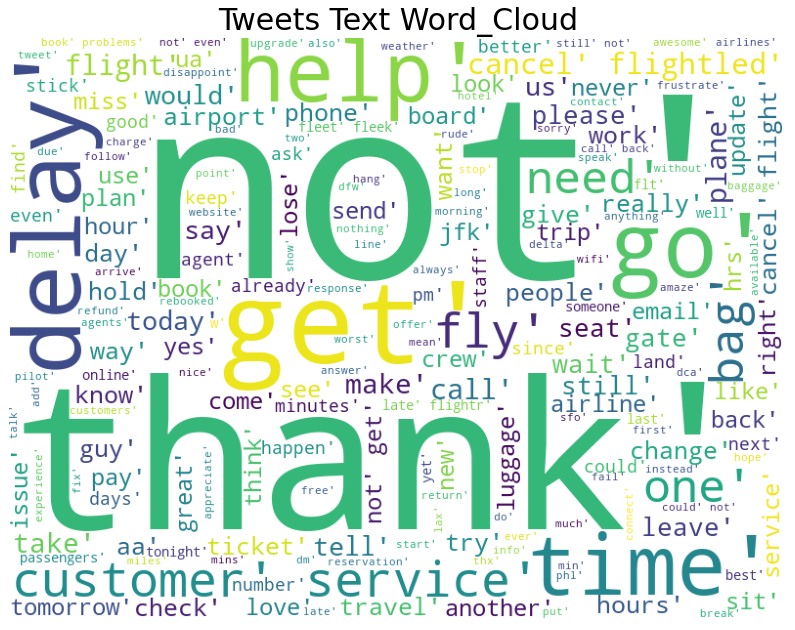

In [219]:
## World Cloud for all words
show_wordcloud(df,'Tweets Text Word_Cloud')


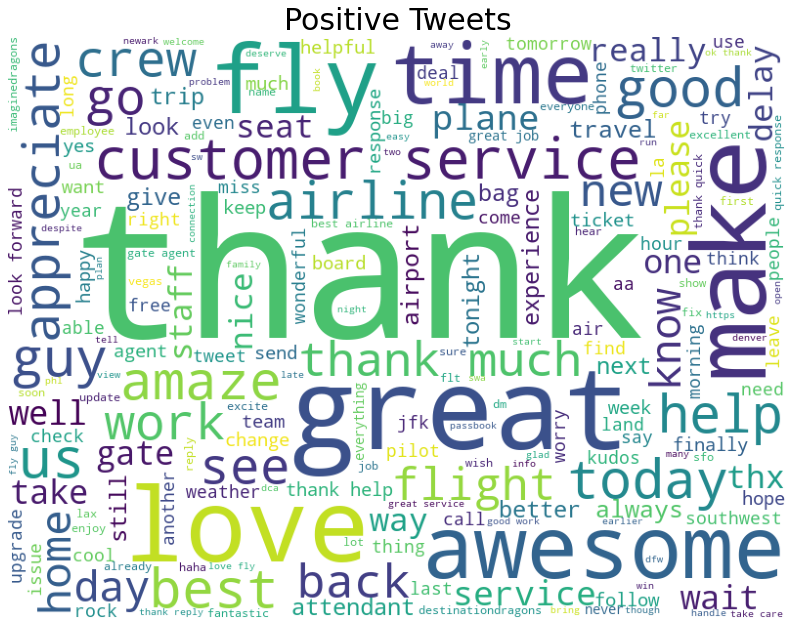

In [220]:
## World Cloud for positive words
show_wordcloud(USA_tweets[USA_tweets.airline_sentiment == 'positive'], title = "Positive Tweets")

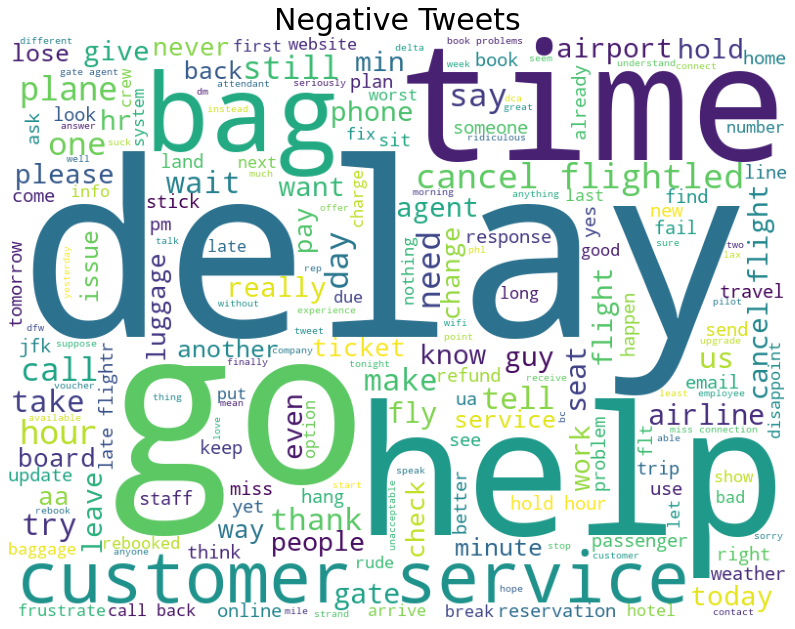

In [221]:
## World Cloud for negative words
show_wordcloud(USA_tweets[USA_tweets.airline_sentiment == 'negative'], title = "Negative Tweets")

In [222]:
tweets_data = USA_tweets.copy()

In [223]:
# Encoding airline_sentiment for model building
tweets_data['airline_sentiment'].replace({'positive' : 1 , 'negative':-1, 'neutral' : '0'}, inplace=True)

In [224]:
tweets_data.head(5)

,text,airline_sentiment
0,dhepburn say,0
1,plus add commercials experience tacky,1
2,not today must mean need take another trip,0
3,really aggressive blast obnoxious entertainment guests face little recourse,-1
4,really big bad thing,-1


### **Building the model based on CountVectorizer and Random Forest**

In [225]:
# Vectorization use CountVectorizer (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = vect.fit_transform(tweets_data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [226]:
# display vectors for some tokens
print(vect.vocabulary_)

{'say': 1548, 'plus': 1343, 'add': 25, 'commercials': 354, 'experience': 639, 'not': 1205, 'today': 1786, 'must': 1169, 'mean': 1101, 'need': 1181, 'take': 1732, 'another': 87, 'trip': 1815, 'really': 1432, 'blast': 214, 'entertainment': 596, 'face': 654, 'little': 1034, 'big': 202, 'bad': 163, 'thing': 1760, 'seriously': 1575, 'would': 1969, 'pay': 1293, 'seat': 1559, 'play': 1338, 'fly': 726, 'va': 1880, 'yes': 1986, 'nearly': 1180, 'every': 614, 'time': 1779, 'vx': 1900, 'go': 796, 'away': 156, 'miss': 1144, 'opportunity': 1246, 'without': 1953, 'hat': 828, 'https': 879, 'well': 1929, 'amaze': 75, 'arrive': 116, 'hour': 871, 'early': 564, 'good': 800, 'know': 983, 'suicide': 1706, 'second': 1561, 'lead': 1007, 'death': 467, 'among': 79, 'teens': 1743, 'pretty': 1373, 'much': 1166, 'better': 198, 'great': 804, 'deal': 465, 'already': 69, 'think': 1762, 'nd': 1177, 'australia': 143, 'even': 610, 'st': 1666, 'yet': 1988, 'fabulous': 653, 'sky': 1622, 'stress': 1693, 'travel': 1809, 'th

In [227]:
#Shape of the features
data_features.shape

(14640, 2000)

In [228]:
#Target variable
labels = tweets_data['airline_sentiment']
labels = labels.astype('int')

In [229]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [230]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7396174863387979


### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [231]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [232]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

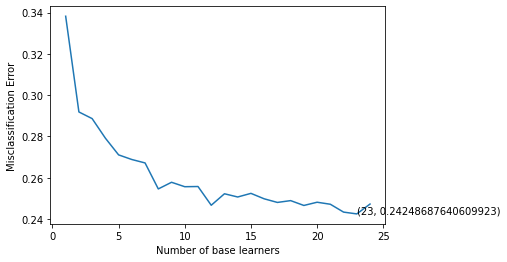

In [233]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [234]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.77367941712204

## Confusion Matrix

In [235]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[2522  190  102]
 [ 363  432   89]
 [ 168   82  444]]
0.77367941712204


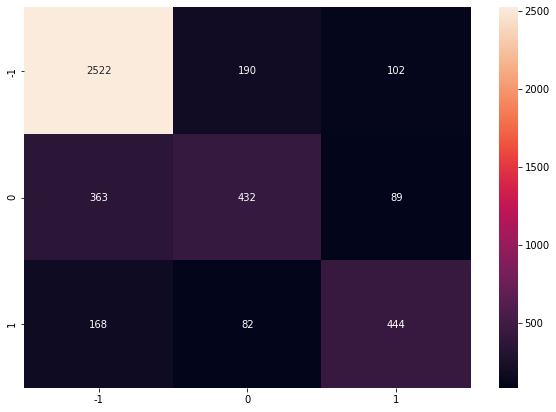

In [236]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in [-1, 0,1]],
                  columns = [i for i in [-1, 0,1]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model**

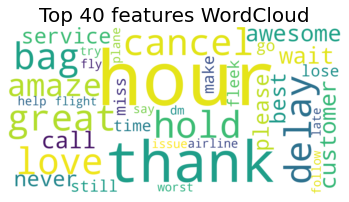

In [237]:
all_features = vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### **Building the model based on TfidfVectorizer and Random Forest**

In [238]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import TfidfVectorizer

vect_tfidf = TfidfVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features_tfidf = vect_tfidf.fit_transform(tweets_data['text'])

data_features_tfidf = data_features_tfidf.toarray()                        # Convert the data features to array.

In [239]:
print(vect_tfidf.vocabulary_)
print(vect_tfidf.idf_)

{'say': 1548, 'plus': 1343, 'add': 25, 'commercials': 354, 'experience': 639, 'not': 1205, 'today': 1786, 'must': 1169, 'mean': 1101, 'need': 1181, 'take': 1732, 'another': 87, 'trip': 1815, 'really': 1432, 'blast': 214, 'entertainment': 596, 'face': 654, 'little': 1034, 'big': 202, 'bad': 163, 'thing': 1760, 'seriously': 1575, 'would': 1969, 'pay': 1293, 'seat': 1559, 'play': 1338, 'fly': 726, 'va': 1880, 'yes': 1986, 'nearly': 1180, 'every': 614, 'time': 1779, 'vx': 1900, 'go': 796, 'away': 156, 'miss': 1144, 'opportunity': 1246, 'without': 1953, 'hat': 828, 'https': 879, 'well': 1929, 'amaze': 75, 'arrive': 116, 'hour': 871, 'early': 564, 'good': 800, 'know': 983, 'suicide': 1706, 'second': 1561, 'lead': 1007, 'death': 467, 'among': 79, 'teens': 1743, 'pretty': 1373, 'much': 1166, 'better': 198, 'great': 804, 'deal': 465, 'already': 69, 'think': 1762, 'nd': 1177, 'australia': 143, 'even': 610, 'st': 1666, 'yet': 1988, 'fabulous': 653, 'sky': 1622, 'stress': 1693, 'travel': 1809, 'th

In [240]:
# Split data into training and testing set.


X_train, X_test, y_train, y_test = train_test_split(data_features_tfidf, labels, test_size=0.3, random_state=42)

In [241]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features_tfidf, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7489071038251367


### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [242]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

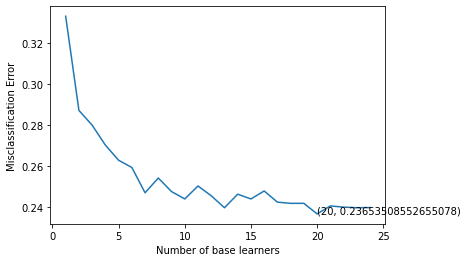

In [243]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [244]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7789162112932605

## Confusion Matrix

In [245]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[2581  184   49]
 [ 367  441   76]
 [ 210   85  399]]
0.7789162112932606


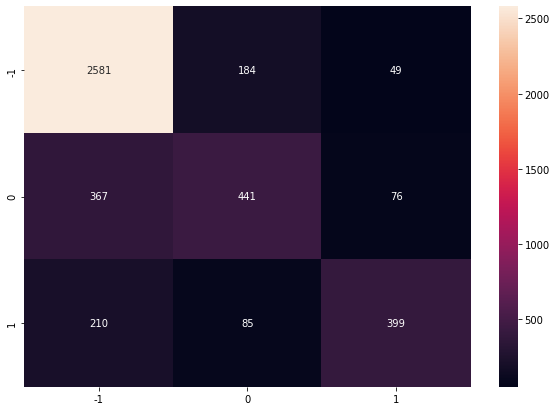

In [246]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in [-1, 0,1]],
                  columns = [i for i in [-1, 0,1]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### **Word Cloud of top 40 important features from the tfidfVectorizer + Random Forest based model**

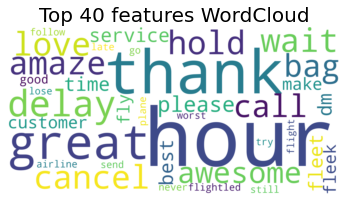

In [247]:
all_features = vect_tfidf.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()



### Model Building using tfidfVectorizer, RandomForest Classifier and using  data containing airline names. 

In [248]:
from nltk.corpus import stopwords 
stopwords = stopwords.words('english')


customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# newStopWords = [ 'americanair', 'virginamerica', 'usairways', 'jetblue', 'southwestair', 'http', 'flight', 'united']
# stopwords.extend(newStopWords)

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))           

In [249]:

orig_data['text'] = orig_data.apply(lambda row: normalize(row['text']), axis=1)

orig_data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


In [250]:
vect_tfidf_orig = TfidfVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
orig_data_features = vect_tfidf_orig.fit_transform(orig_data['text'])

orig_data_features = orig_data_features.toarray()                        # Convert the data features to array.

In [251]:
print(vect_tfidf_orig.vocabulary_)
print(vect_tfidf_orig.idf_)

{'virginamerica': 1889, 'say': 1539, 'plus': 1334, 'add': 26, 'experience': 633, 'not': 1199, 'today': 1779, 'must': 1163, 'mean': 1096, 'need': 1175, 'take': 1722, 'another': 86, 'trip': 1808, 'really': 1424, 'entertainment': 590, 'face': 648, 'little': 1031, 'big': 203, 'bad': 162, 'thing': 1752, 'seriously': 1566, 'would': 1969, 'pay': 1287, 'flight': 705, 'seat': 1550, 'play': 1329, 'fly': 721, 'va': 1878, 'yes': 1986, 'nearly': 1174, 'every': 608, 'time': 1772, 'vx': 1899, 'go': 789, 'away': 154, 'miss': 1138, 'opportunity': 1240, 'without': 1953, 'hat': 822, 'https': 873, 'well': 1929, 'amaze': 73, 'arrive': 115, 'hour': 864, 'early': 558, 'good': 794, 'know': 980, 'second': 1552, 'lead': 1004, 'death': 463, 'among': 78, 'pretty': 1364, 'much': 1160, 'better': 200, 'great': 798, 'deal': 461, 'already': 67, 'think': 1754, 'nd': 1171, 'australia': 141, 'even': 604, 'st': 1656, 'yet': 1988, 'fabulous': 647, 'sky': 1613, 'stress': 1683, 'travel': 1802, 'http': 872, 'thank': 1748, 'sc

In [252]:
orig_data['airline_sentiment'].replace({'positive' : 1 , 'negative':-1, 'neutral' : '0'}, inplace=True)

In [253]:
labels1 = orig_data['airline_sentiment']
labels1 = labels1.astype('int')

In [254]:
# Split data into training and testing set.


X_train, X_test, y_train, y_test = train_test_split(orig_data_features, labels1, test_size=0.3, random_state=42)

In [255]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, orig_data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7097677595628415


In [256]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

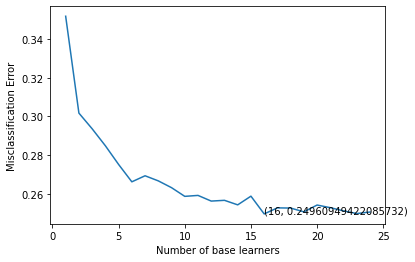

In [257]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [258]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7663934426229508

## Confusion Matrix

In [259]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[2624  139   51]
 [ 455  366   63]
 [ 220   98  376]]
0.7663934426229508


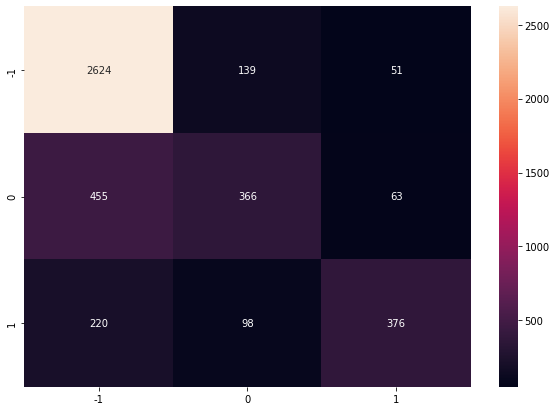

In [269]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in [-1, 0,1] ],
                  columns = [i for i in [-1, 0,1]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### Word Cloud of top 40 important features from the TfIdfVectorizer + Random Forest based model

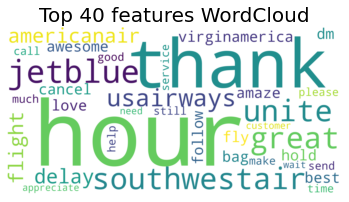

In [270]:
all_features = vect_tfidf_orig.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

## Summarize your understanding of the application of Various Pre-processing and Vectorization and the performance of your model on this dataset.



### Model Building using tfidfVectorizer, RandomForest Classifier and using  raw untreated data to understand performance difference. 

**Using raw un processed data to build model to understand the performance.**

In [271]:
raw_data=tweets[['text', 'airline_sentiment']]
raw_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [272]:
raw_data['text'].head()

0                                                                                               @VirginAmerica What @dhepburn said.
1                                                          @VirginAmerica plus you've added commercials to the experience... tacky.
2                                                           @VirginAmerica I didn't today... Must mean I need to take another trip!
3    @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4                                                                           @VirginAmerica and it's a really big bad thing about it
Name: text, dtype: object

In [273]:
vect_raw = TfidfVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
raw_data_features = vect_raw.fit_transform(raw_data['text'])

raw_data_features = raw_data_features.toarray()                        # Convert the data features to array.

In [274]:
raw_data['airline_sentiment'].replace({'positive' : 1 , 'negative':-1, 'neutral' : '0'}, inplace=True)

In [275]:
labels2 = raw_data['airline_sentiment']
labels2 = labels2.astype('int')

In [276]:
# Split data into training and testing set.


X_train, X_test, y_train, y_test = train_test_split(raw_data_features, labels2, test_size=0.3, random_state=42)

In [277]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, raw_data_features, labels2, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.709016393442623


- The performance came down using raw data,

In [278]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

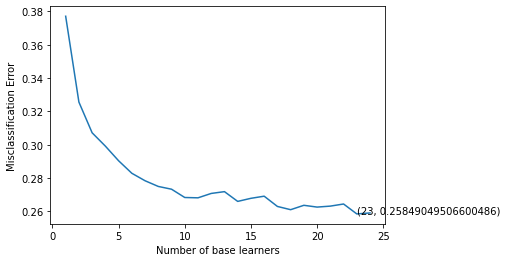

In [279]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [280]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7650273224043715

### **Summary**:

- We used a dataset which has **tweets for US Airlines in text format and their sentiment category as "positive", 'neutral" and "negative".**
- The goal was to **build a model for text-classification (Sentiment Analysis)**.
- We **pre-processed the data** using various techniques and libraries.
- We **created a Word Cloud plot** based on summary and positive and negative sentiment.
- The **pre-processed data is converted to numbers (vectorized)**, so that we can feed the data into the model.
- We trained the model and optimized the parameter, which **led to an increase the overall accuracy.**
- After building the classification model, we **predicted the results for the test data.**
- We saw that using the above techniques, our model performed well in perspective of how text classification models perform.
- By using raw data without preprocessing and tfidfVectorizer, the test accuracy is 70.9 , but by tuning hyper parameters, it improved to 76.5
- By using preprocessed data not containing airline names and CountVectorizer, the test accuracy is 73.9 , but by tuning hyper parameters, it improved to 77.3 
- By using preprocessed data not containing airline names and tfidfVectorizer, the test accuracy is 74.9, but by tuning hyper parameters, it improved to 77.9
- By using preprocessed data containing airline names and tfidfVectorizer, the test accuracy is 70.9, but by tuning hyper parameters, it improved to 76.6

Conclusion:

- **Preprocessing of data improves performance(accuracy)**
- **TFIDFVectorizer derived features have better performance(accuracy) than CountVectorizer**
- **Removing airline names from words list(text) improved performance(accuracy)**